In [9]:
data_path="/data3/hcxia/Adahist2/datasets/yahoofinance_day_prices_future_etfs"
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime

In [10]:
import os
import pandas as pd

# Get the list of CSV files
files = os.listdir(data_path)
montly_return_data={}
# Loop through each file and process it
for file in files:
    if file.endswith(".csv"):
        print(f"Processing file: {file}")
        # Read the CSV file
        data = pd.read_csv(os.path.join(data_path, file))
        
        # Ensure the data has a 'Date' column and it's in datetime format
        if 'Date' in data.columns:
            data['Date'] = pd.to_datetime(data['Date'])
            data.set_index('Date', inplace=True)
        else:
            print(f"File {file} does not have a 'Date' column. Skipping...")
            continue
        
        # Ensure there is a 'Close' column
        if 'Close' in data.columns:
            # Resample to monthly frequency, taking the last close price of the month
            monthly_close = data['Close'].resample('ME').last()
            # cast to numeric
            monthly_close = pd.to_numeric(monthly_close, errors='coerce')
            # print(monthly_close)
            
            # Calculate monthly return
            monthly_return = monthly_close.pct_change().dropna()
            
            # Save or display the result
            print(f"Monthly returns for {file}:\n", monthly_return.head())
            # save the monthly return data into the dictionary
            montly_return_data[file]=monthly_return
        else:
            print(f"File {file} does not have a 'Close' column. Skipping...")
# merge all the monthly returns of the files into one dataframe
df=pd.DataFrame(montly_return_data)
# print(df.head())
# calculate the non-nan count of each column
non_nan_count=df.count()
print(non_nan_count)



Processing file: FXE.csv
Monthly returns for FXE.csv:
 Date
2006-01-31 00:00:00+00:00    0.027339
2006-02-28 00:00:00+00:00   -0.019302
2006-03-31 00:00:00+00:00    0.017253
2006-04-30 00:00:00+00:00    0.042401
2006-05-31 00:00:00+00:00    0.014454
Name: Close, dtype: float64
Processing file: FXB.csv
Monthly returns for FXB.csv:
 Date
2006-07-31 00:00:00+00:00    0.013465
2006-08-31 00:00:00+00:00    0.018461
2006-09-30 00:00:00+00:00   -0.015717
2006-10-31 00:00:00+00:00    0.018682
2006-11-30 00:00:00+00:00    0.030618
Name: Close, dtype: float64
Processing file: DBC.csv
Monthly returns for DBC.csv:
 Date
2006-03-31 00:00:00+00:00    0.027909
2006-04-30 00:00:00+00:00    0.070175
2006-05-31 00:00:00+00:00   -0.003903
2006-06-30 00:00:00+00:00   -0.008621
2006-07-31 00:00:00+00:00    0.022134
Name: Close, dtype: float64
Processing file: CYB.csv
Monthly returns for CYB.csv:
 Date
2008-06-30 00:00:00+00:00    0.011526
2008-07-31 00:00:00+00:00    0.000393
2008-08-31 00:00:00+00:00   -0

In [11]:
# read the macroeconomic data
# save the merged data to a csv file
macro_data_folder = "/data3/hcxia/Adahist2/datasets/macro_processed"
macro_data_name = "macro_data.csv"
macro_data=pd.read_csv(os.path.join(macro_data_folder,macro_data_name))

In [12]:
print(macro_data.head())

         Date  exp.real.short.rate.5  exp.inflation.5  real.term.prem.5  \
0  2000-01-01               2.199755         3.298245          0.932425   
1  2000-02-01               2.314455         3.255515          0.914670   
2  2000-03-01               2.315948         3.216604          0.810165   
3  2000-04-01               2.254247         3.162505          0.718184   
4  2000-05-01               2.443314         3.259314          0.829359   

   inflation.risk.prem.5  tips.liq.prem.5  nominal.yield.raw.5  \
0               0.113740         1.260895             6.524823   
1               0.120580         1.140980             6.605611   
2               0.079504         1.127765             6.420187   
3               0.048016         1.115058             6.180498   
4               0.079000         0.972991             6.603662   

   nominal.yield.fitted.5  ic.raw.5  ic.fitted.5  ...  10Yr Treasury  \
0                6.544165  2.181758     2.151090  ...       0.012501   
1       

                       Date  FXE.csv  FXB.csv  DBC.csv  CYB.csv  FXA.csv  \
0 2000-02-29 00:00:00+00:00      NaN      NaN      NaN      NaN      NaN   
1 2000-03-31 00:00:00+00:00      NaN      NaN      NaN      NaN      NaN   
2 2000-04-30 00:00:00+00:00      NaN      NaN      NaN      NaN      NaN   
3 2000-05-31 00:00:00+00:00      NaN      NaN      NaN      NaN      NaN   
4 2000-06-30 00:00:00+00:00      NaN      NaN      NaN      NaN      NaN   

   GLD.csv   QQQ.csv  FXC.csv  CORN.csv  ...  FXY.csv  UGA.csv  USO.csv  \
0      NaN  0.190244      NaN       NaN  ...      NaN      NaN      NaN   
1      NaN  0.025761      NaN       NaN  ...      NaN      NaN      NaN   
2      NaN -0.134703      NaN       NaN  ...      NaN      NaN      NaN   
3      NaN -0.122691      NaN       NaN  ...      NaN      NaN      NaN   
4      NaN  0.124060      NaN       NaN  ...      NaN      NaN      NaN   

   NIB.csv  SLV.csv  UNG.csv   SPY.csv  DBB.csv  year  month  
0      NaN      NaN      NaN 

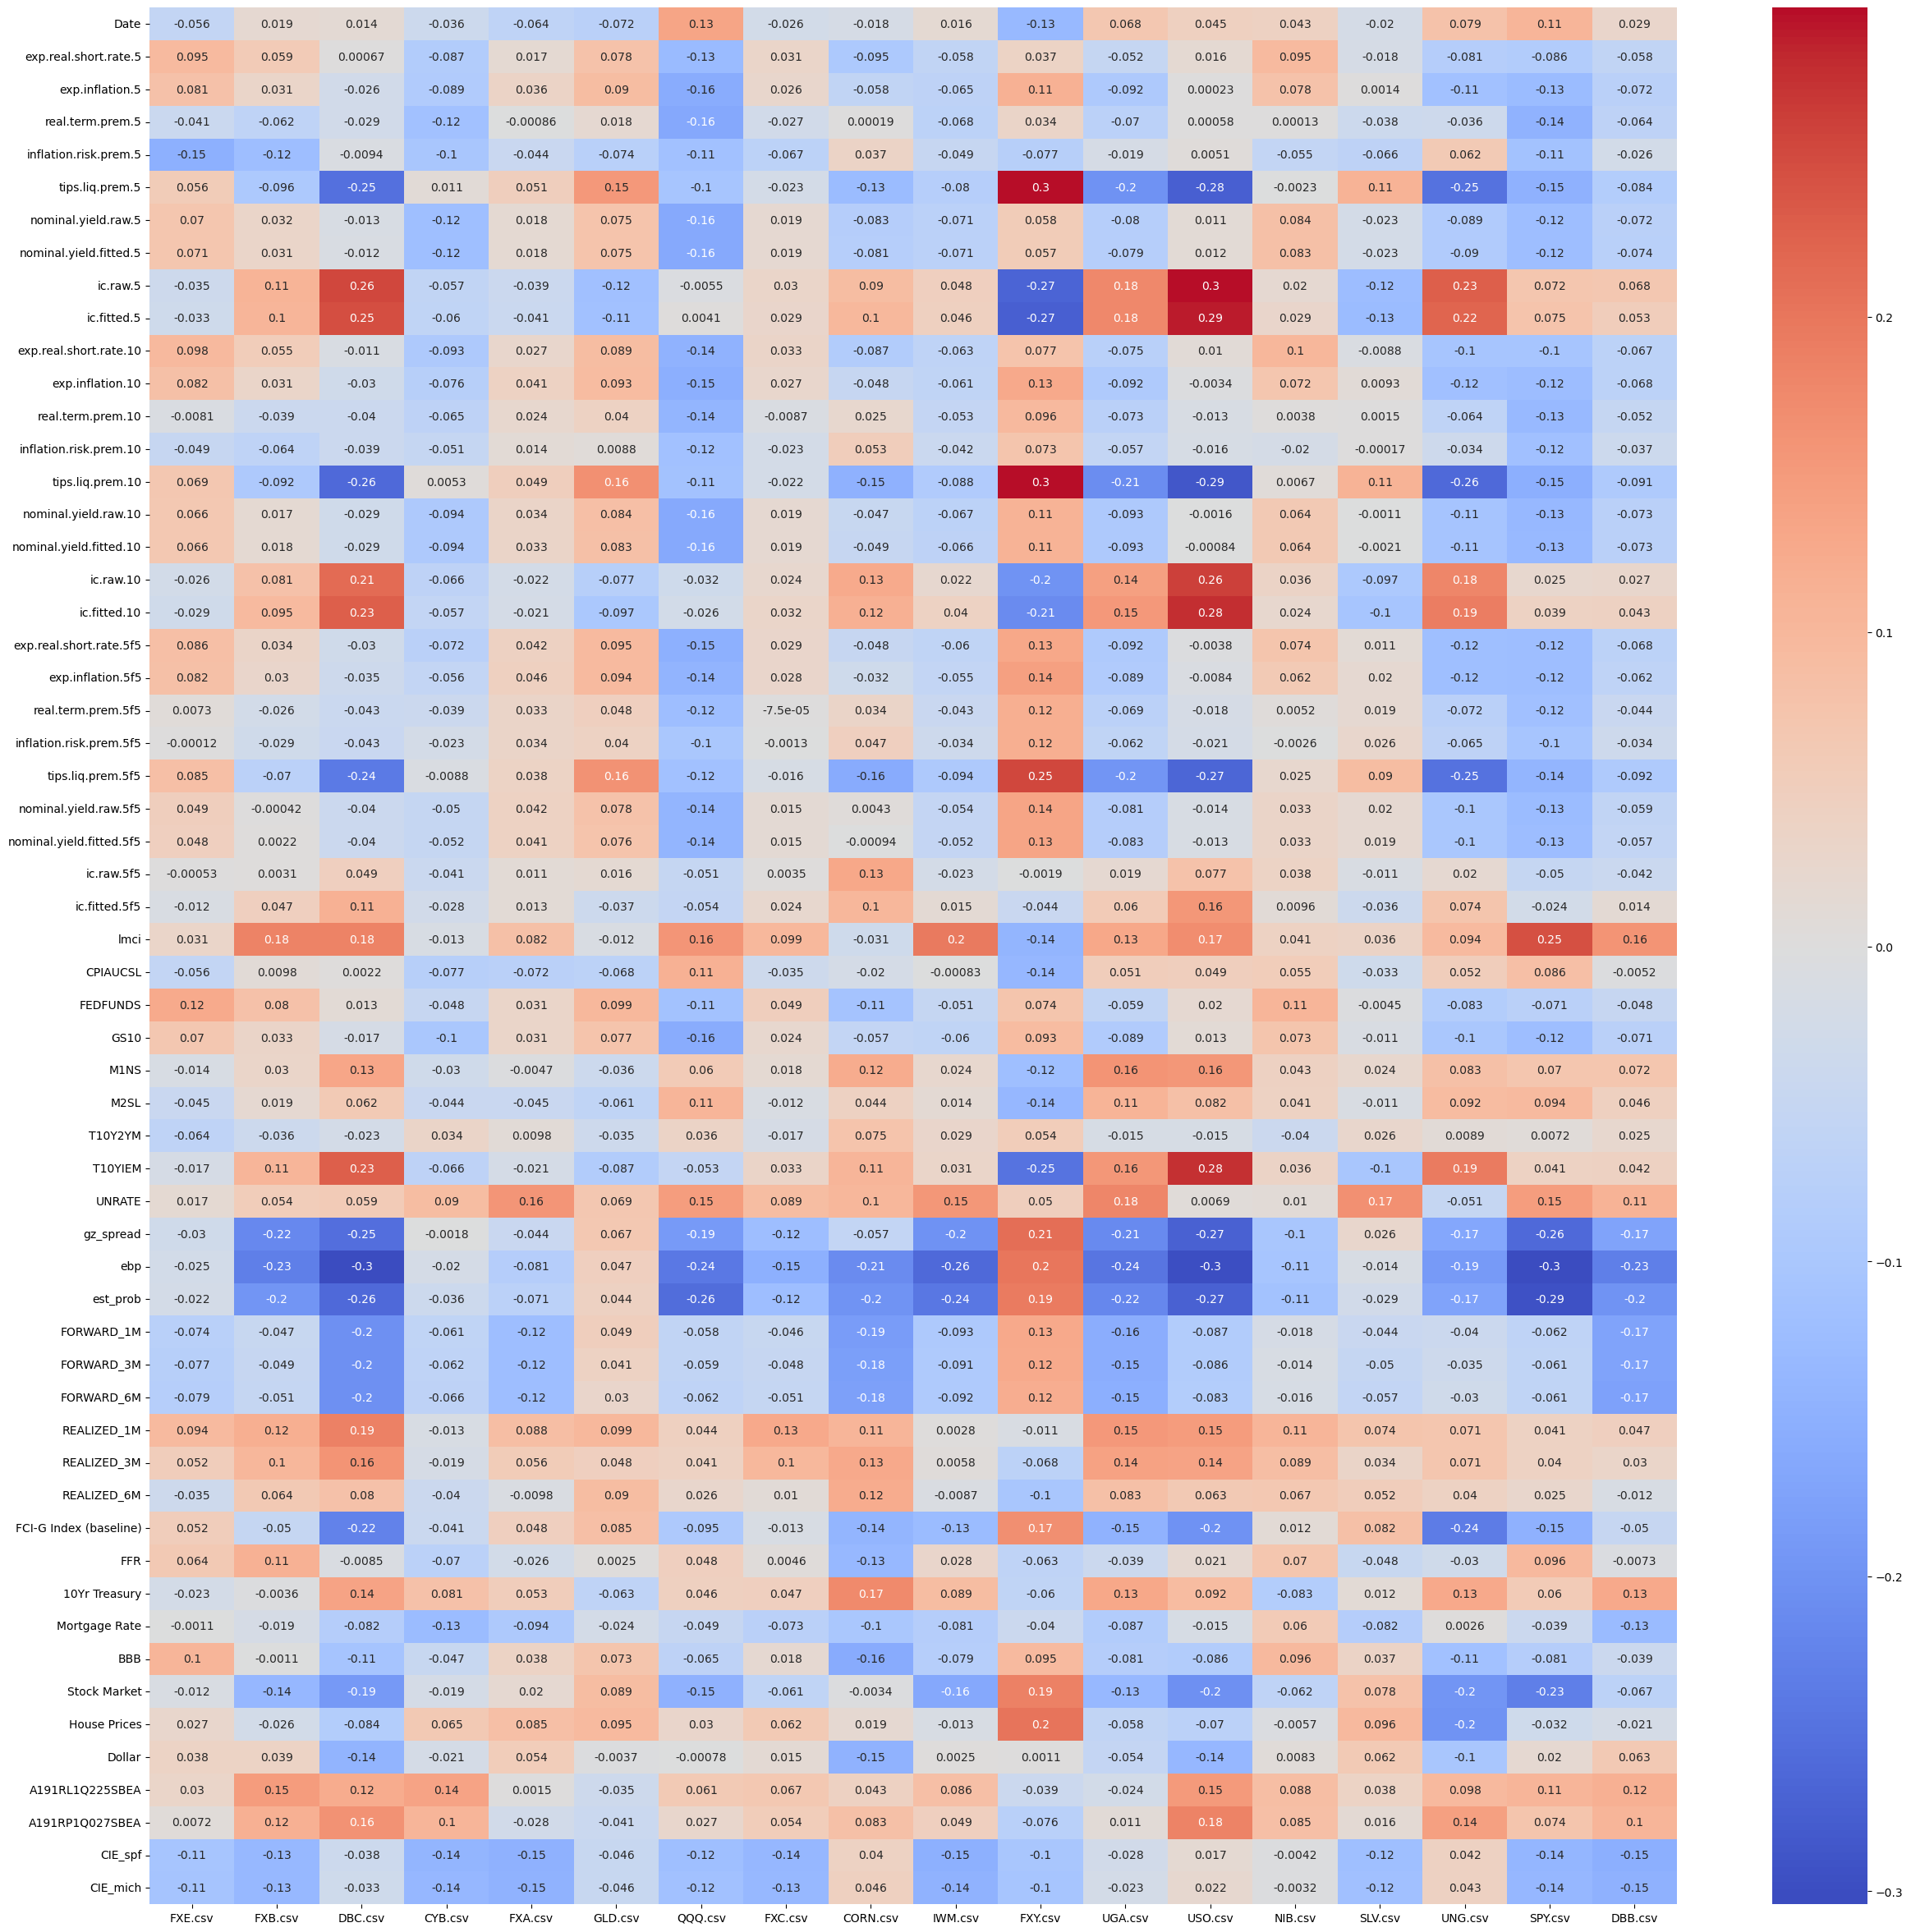

<Figure size 640x480 with 0 Axes>

In [13]:
import pandas as pd

# Initialize a dictionary to store IC results
ic_data = {}
# reset the index of df as the Date column
df.reset_index(inplace=True)
# Add 'year' and 'month' columns to align data
df['year'] = df['Date'].dt.year
df['month'] = df['Date'].dt.month
macro_data['Date'] = pd.to_datetime(macro_data['Date'])
macro_data['year'] = macro_data['Date'].dt.year
macro_data['month'] = macro_data['Date'].dt.month
print(df.head())
print(macro_data.head())

# Loop through each ETF column in the DataFrame
for column in df.columns:
    if column not in ['Date', 'year', 'month']:  # Skip non-relevant columns
        # Align macroeconomic data and ETF returns by year and month
        merged_data = pd.merge(
            df[['year', 'month', column]],
            macro_data,
            on=['year', 'month']
        )
        
        # Calculate IC (correlation coefficient) for each macroeconomic variable
        correlations = merged_data.corr()[column].drop(['year', 'month', column])
        
        # Store results in the dictionary
        ic_data[column] = correlations

# Convert IC dictionary to DataFrame
ic_df = pd.DataFrame(ic_data)

# Display the top of the IC DataFrame
print(ic_df.head())
# Save the IC DataFrame to a CSV file
ic_df.to_csv("return_macro_ic_results.csv")
# Plot the IC DataFrame as a heatmap
plt.figure(figsize=(30, 30))
sns.heatmap(ic_df, annot=True, cmap='coolwarm', center=0)
plt.show()
# save the heatmap to a file
plt.savefig("return_macro_ic_heatmap.png")

low_correlation_stocks: Index(['real.term.prem.10', 'inflation.risk.prem.10', 'real.term.prem.5f5',
       'inflation.risk.prem.5f5', 'ic.raw.5f5', 'ic.fitted.5f5', 'T10Y2YM',
       'FFR'],
      dtype='object')
low_correlation_macro: Index(['FXA.csv', 'FXC.csv', 'NIB.csv', 'SLV.csv'], dtype='object')


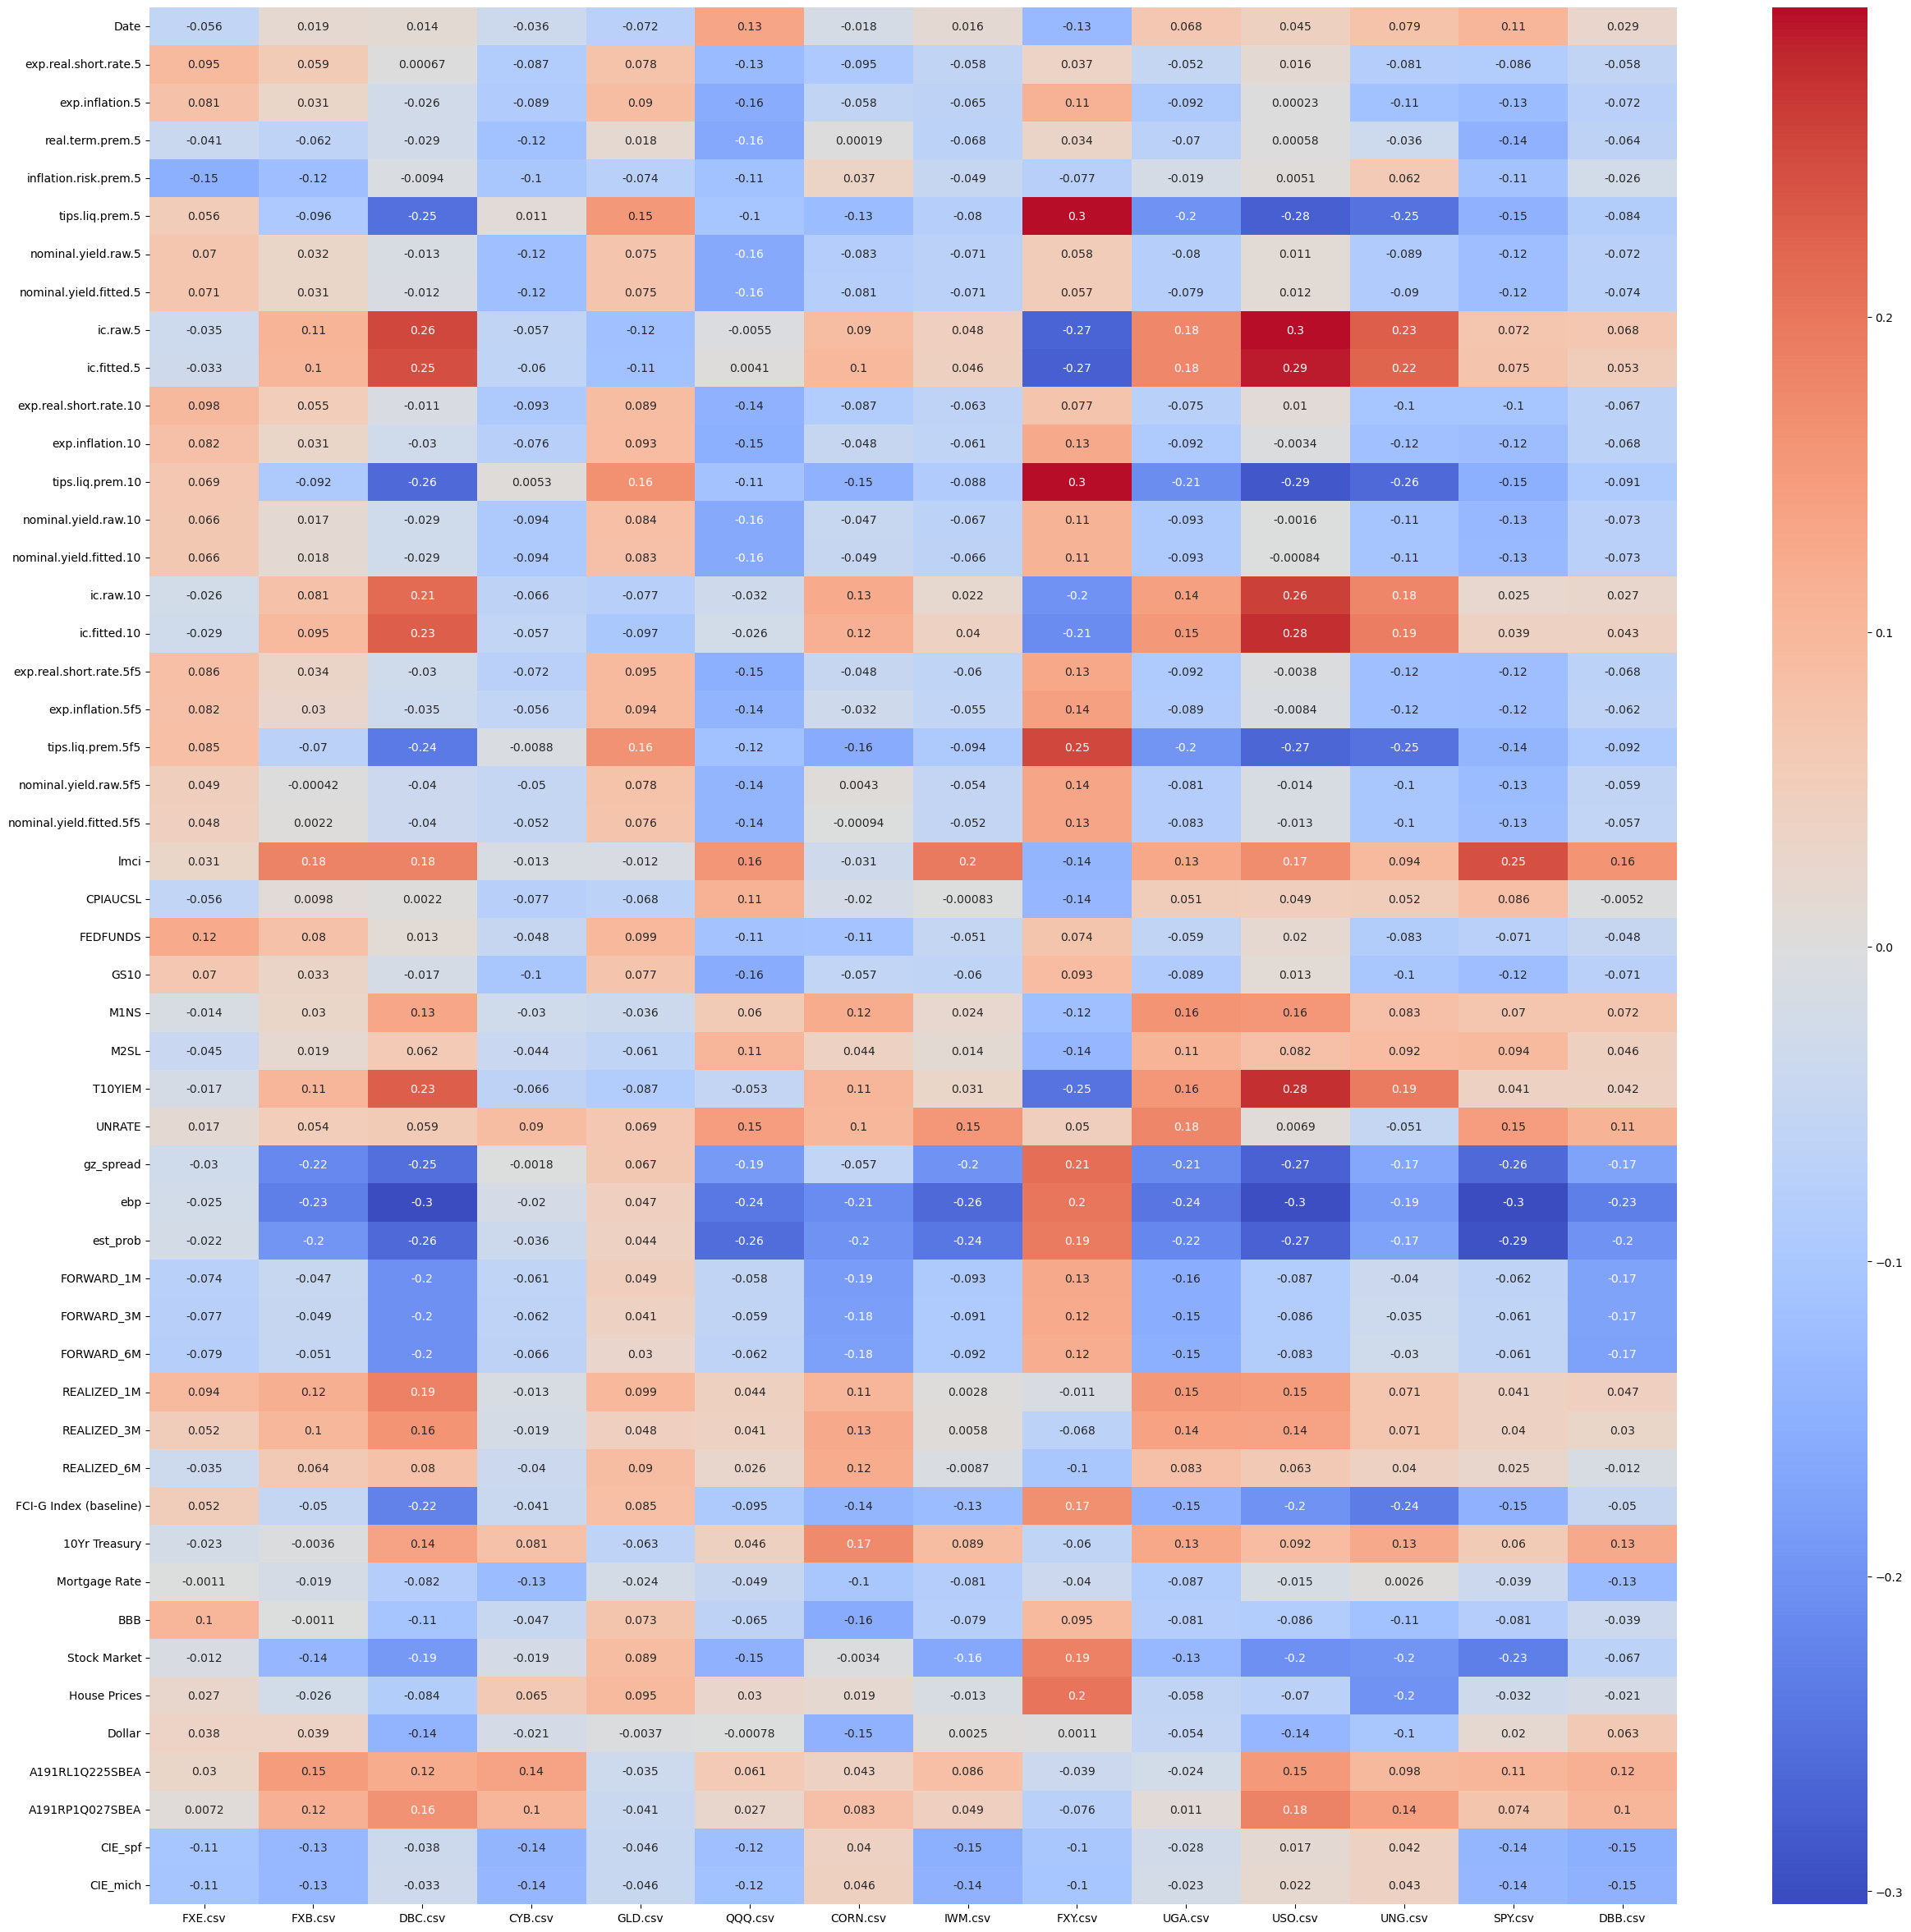

<Figure size 640x480 with 0 Axes>

In [14]:
# display the stocks / macro variables which have low correlation for all macro variables / stocks
# Get stocks with low correlation (row-wise operation)
low_correlation_stocks = ic_df.loc[ic_df.abs().mean(axis=1) < 0.05].index
print("low_correlation_stocks:", low_correlation_stocks)

# Get macro variables with low correlation (column-wise operation)
low_correlation_macro = ic_df.columns[ic_df.abs().mean(axis=0) < 0.05]
print("low_correlation_macro:", low_correlation_macro)

# save the low correlation stocks and macro variables to a file
with open("low_correlation_stocks.txt", "w") as f:
    f.write("\n".join(low_correlation_stocks))
with open("low_correlation_macro.txt", "w") as f:
    f.write("\n".join(low_correlation_macro))

# remove the low correlation stocks and macro variables from the ic_df
ic_df.drop(index=low_correlation_stocks, columns=low_correlation_macro, inplace=True)
# Plot the IC DataFrame as a heatmap
plt.figure(figsize=(30, 30))
sns.heatmap(ic_df, annot=True, cmap='coolwarm', center=0)
plt.show()
# save the heatmap to a file
plt.savefig("return_macro_ic_heatmap_filtered.png")


In [15]:
# rank the stocks and macro variables based on the average correlation
# Calculate the average correlation for each stock
stock_avg_correlation = ic_df.abs().mean(axis=0)
# Sort the stocks by average correlation
stock_avg_correlation = stock_avg_correlation.sort_values(ascending=False)
# print with the format of "stock: {correlation}"
print("Stocks ranked by average correlation:")
for stock, correlation in stock_avg_correlation.items():
    # parse the stock name, remove the .csv suffix
    stock = stock.split(".")[0]
    print(f"{stock}: {correlation:.4f}")
# export the stock_list and the macro_list to a file
stock_list = stock_avg_correlation.index
with open("stock_list.txt", "w") as f:
    f.write("\n".join(stock_list))
print("ic_df columns:", ic_df.columns)
print("ic_df index:", ic_df.index)
macro_list = ic_df.index
# exclude the "Data" column
macro_list = [macro for macro in macro_list if macro != "Date"]
# remove the following macro variables
# FORWARD_1M
# FORWARD_3M
# FORWARD_6M
macro_list = [macro for macro in macro_list if macro not in ["FORWARD_1M", "FORWARD_3M", "FORWARD_6M"]]
with open("macro_list.txt", "w") as f:
    f.write("\n".join(macro_list))

Stocks ranked by average correlation:
FXY: 0.1301
DBC: 0.1186
UNG: 0.1175
UGA: 0.1128
SPY: 0.1110
USO: 0.1101
QQQ: 0.1050
CORN: 0.0894
DBB: 0.0835
IWM: 0.0762
GLD: 0.0738
FXB: 0.0718
CYB: 0.0646
FXE: 0.0569
ic_df columns: Index(['FXE.csv', 'FXB.csv', 'DBC.csv', 'CYB.csv', 'GLD.csv', 'QQQ.csv',
       'CORN.csv', 'IWM.csv', 'FXY.csv', 'UGA.csv', 'USO.csv', 'UNG.csv',
       'SPY.csv', 'DBB.csv'],
      dtype='object')
ic_df index: Index(['Date', 'exp.real.short.rate.5', 'exp.inflation.5', 'real.term.prem.5',
       'inflation.risk.prem.5', 'tips.liq.prem.5', 'nominal.yield.raw.5',
       'nominal.yield.fitted.5', 'ic.raw.5', 'ic.fitted.5',
       'exp.real.short.rate.10', 'exp.inflation.10', 'tips.liq.prem.10',
       'nominal.yield.raw.10', 'nominal.yield.fitted.10', 'ic.raw.10',
       'ic.fitted.10', 'exp.real.short.rate.5f5', 'exp.inflation.5f5',
       'tips.liq.prem.5f5', 'nominal.yield.raw.5f5',
       'nominal.yield.fitted.5f5', 'lmci', 'CPIAUCSL', 'FEDFUNDS', 'GS10',
       'M1

unique tickers: ['SPY' 'QQQ' 'IWM' 'GLD' 'FXE' 'DBC' 'USO' 'SLV' 'FXC' 'FXB' 'FXA' 'DBB'
 'FXY' 'UNG' 'UGA' 'CYB' 'NIB' 'CORN']


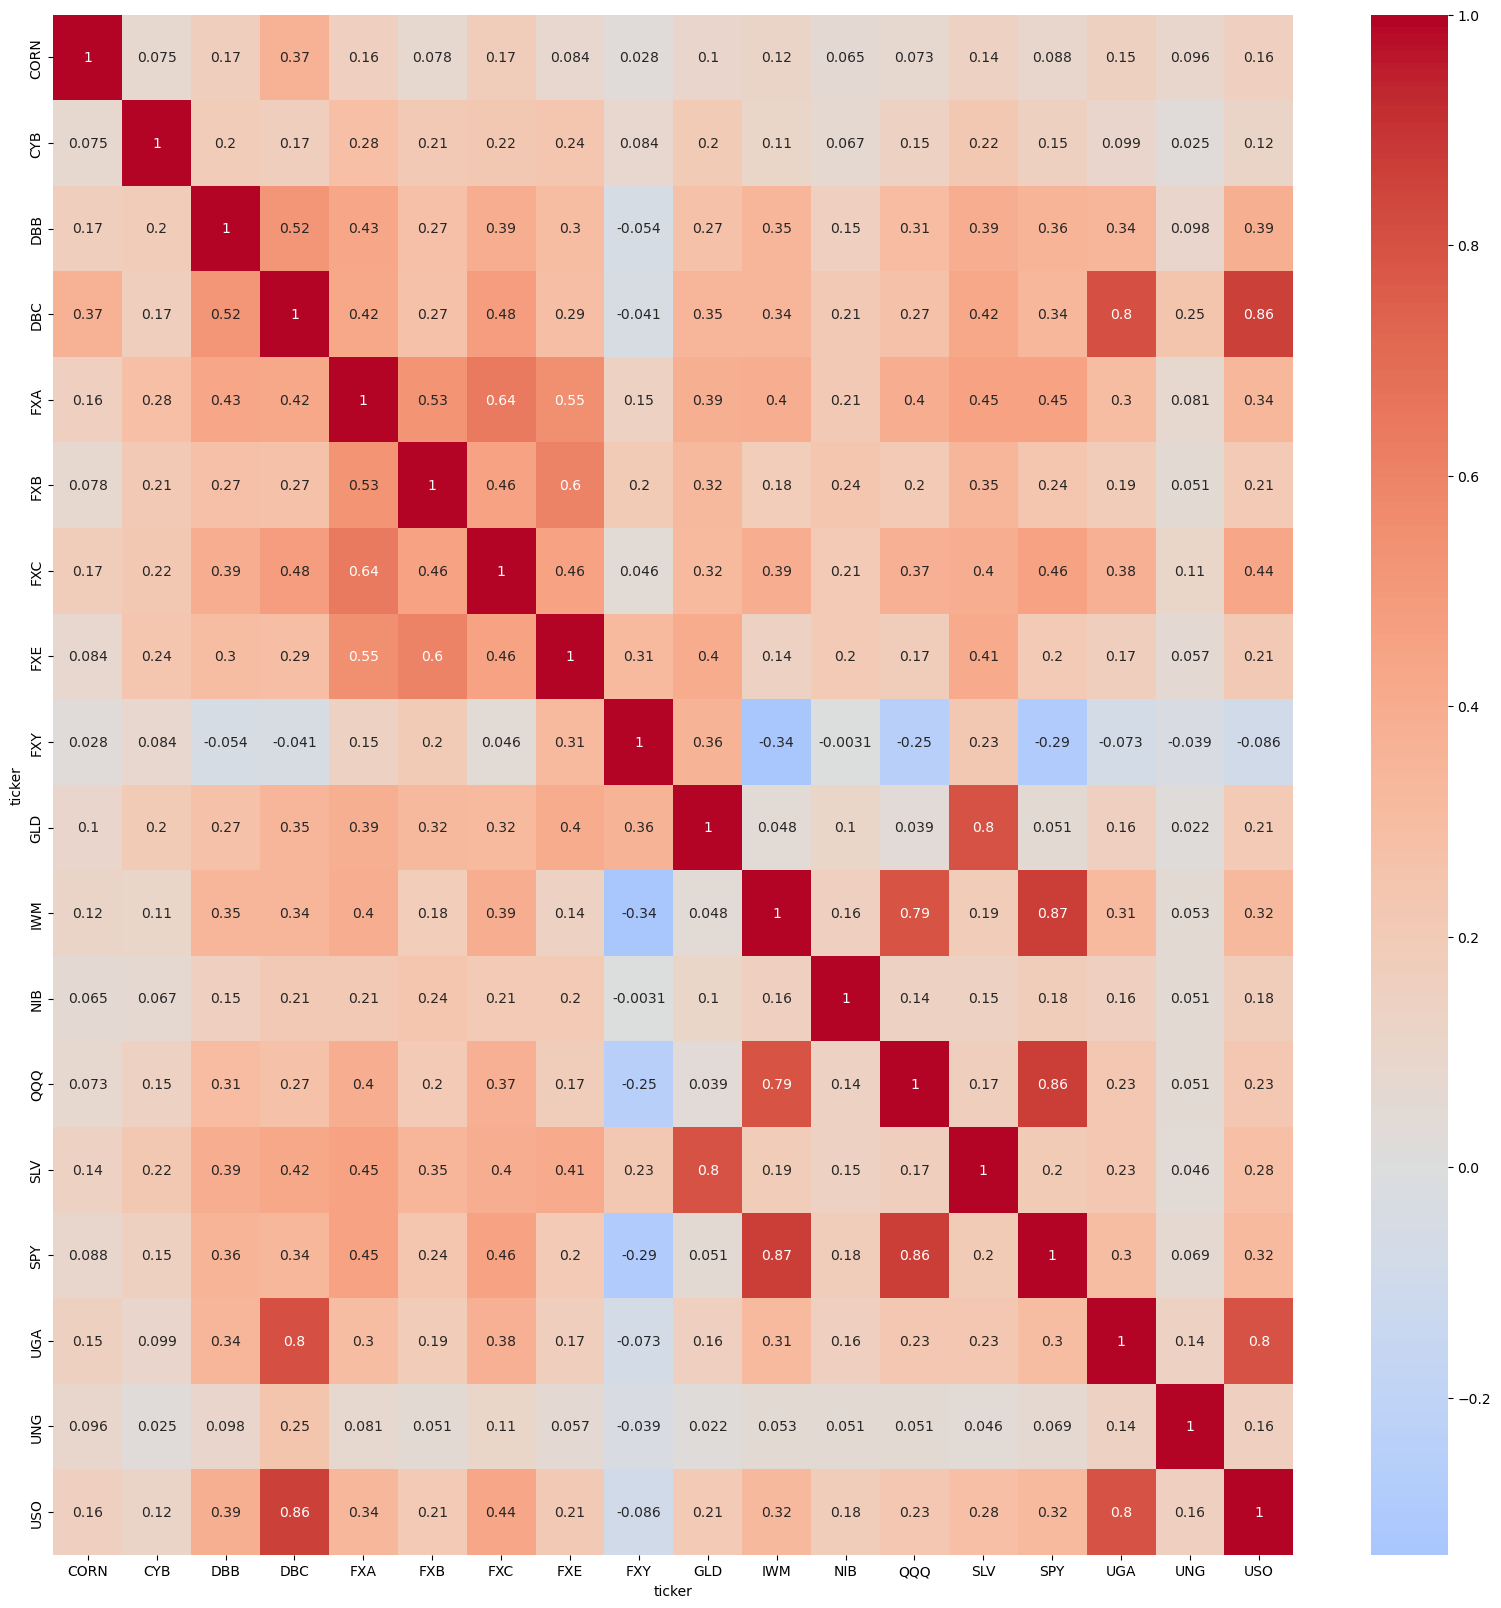

<Figure size 640x480 with 0 Axes>

In [16]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
stock_data_file="/data3/hcxia/Adahist2/datasets/stock_data/megred_stock_data.csv"
# read the stock data
df=pd.read_csv(stock_data_file)
print("unique tickers:", df['ticker'].unique())
# Convert 'Date' column to datetime
df['Date'] = pd.to_datetime(df['Date'])

# Calculate daily close return for each ticker
df['Return'] = df.groupby('ticker')['Close'].pct_change()

# Calculate IC (Information Coefficient) for stock returns
# Pivot the table so each ticker's return is in its own column
pivot_returns = df.pivot(index='Date', columns='ticker', values='Return')

# Calculate the IC as the pairwise correlation of returns for each day
ic_values = pivot_returns.corr(method='spearman')

# Display the heatmap of IC values
plt.figure(figsize=(20, 20))
sns.heatmap(ic_values, annot=True, cmap='coolwarm', center=0)
plt.show()
# save the heatmap to a file
plt.savefig("/data3/hcxia/Adahist2/datasets/stock_data/stock_return_ic_heatmap.png")



# UUP is removed as it is negative FXE
# USO is removed as there are other oil fund like BNO
# KOLD,BOIL is removed as of UNG